In [1]:
import tensorflow as tf
from tensorflow import keras

In [35]:
from tensorflow.keras.datasets import cifar10
(X_full, y_full), (X_test, y_test) = cifar10.load_data()

In [36]:
print(X_full.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

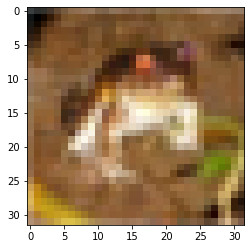

In [37]:
plt.imshow(X_train[0])

*Dense Neural Network*

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='elu',kernel_initializer= 'he_normal'))

In [31]:
model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
optimizer = keras.optimizers.Nadam(learning_rate = 5e-5)

In [45]:
model.compile(optimizer=optimizer,
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full,test_size=0.1, random_state=42)

In [42]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(45000, 32, 32, 3)
(5000, 32, 32, 3)
(45000, 1)
(5000, 1)


In [43]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb]

In [46]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 30s 17ms/step - loss: 8.1622 - accuracy: 0.1606 - val_loss: 2.2250 - val_accuracy: 0.2082
Epoch 2/100
1407/1407 [==============================] - 24s 17ms/step - loss: 2.0969 - accuracy: 0.2380 - val_loss: 2.1075 - val_accuracy: 0.2352
Epoch 3/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.9725 - accuracy: 0.2803 - val_loss: 2.0585 - val_accuracy: 0.2650
Epoch 4/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.8936 - accuracy: 0.3117 - val_loss: 1.9492 - val_accuracy: 0.2858
Epoch 5/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.8289 - accuracy: 0.3358 - val_loss: 1.8921 - val_accuracy: 0.3090
Epoch 6/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.7776 - accuracy: 0.3566 - val_loss: 1.8093 - val_accuracy: 0.3430
Epoch 7/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.7306 - accuracy: 0.3714 - val_loss: 1

1407/1407 [==============================] - 24s 17ms/step - loss: 1.1147 - accuracy: 0.5987 - val_loss: 1.6355 - val_accuracy: 0.4686
Epoch 57/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.1069 - accuracy: 0.6013 - val_loss: 1.6473 - val_accuracy: 0.4522
Epoch 58/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.1056 - accuracy: 0.6017 - val_loss: 1.6377 - val_accuracy: 0.4686
Epoch 59/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.0966 - accuracy: 0.6056 - val_loss: 1.6375 - val_accuracy: 0.4714
Epoch 60/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.0895 - accuracy: 0.6072 - val_loss: 1.6159 - val_accuracy: 0.4704
Epoch 61/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.0816 - accuracy: 0.6108 - val_loss: 1.6519 - val_accuracy: 0.4612
Epoch 62/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.0749 - accuracy: 0.6128 - val_loss: 1.6126 

In [48]:
history_1 = model.evaluate(X_valid,y_valid)

157/157 [==============================] - 1s 5ms/step - loss: 1.6126 - accuracy: 0.4734


In [50]:
import numpy as np
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

*With Batch normalization*

*With HE kernel initiaiizer and ELU activation*

In [51]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32,32,3]))
model.add(keras.layers.BatchNormalization())

for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer = 'he_normal'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(optimizer=optimizer,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [52]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoints_cb = keras.callbacks.ModelCheckpoint('my_cifar10_bn_model.h5',save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoints_cb]

In [53]:
model.fit(X_train,y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 53s 26ms/step - loss: 1.8367 - accuracy: 0.3453 - val_loss: 1.6974 - val_accuracy: 0.3906
Epoch 2/100
1407/1407 [==============================] - 36s 26ms/step - loss: 1.6605 - accuracy: 0.4080 - val_loss: 1.5916 - val_accuracy: 0.4290
Epoch 3/100
1407/1407 [==============================] - 41s 29ms/step - loss: 1.5979 - accuracy: 0.4303 - val_loss: 1.5447 - val_accuracy: 0.4416
Epoch 4/100
1407/1407 [==============================] - 40s 29ms/step - loss: 1.5448 - accuracy: 0.4514 - val_loss: 1.4928 - val_accuracy: 0.4586
Epoch 5/100
1407/1407 [==============================] - 36s 26ms/step - loss: 1.5020 - accuracy: 0.4646 - val_loss: 1.4670 - val_accuracy: 0.4706
Epoch 6/100
1407/1407 [==============================] - 36s 26ms/step - loss: 1.4667 - accuracy: 0.4758 - val_loss: 1.4761 - val_accuracy: 0.4734
Epoch 7/100
1407/1407 [==============================] - 36s 26ms/step - loss: 1.4266 - accuracy: 0.4916 - val_loss: 1

In [54]:
model.evaluate(X_valid,y_valid)

157/157 [==============================] - 1s 6ms/step - loss: 1.4399 - accuracy: 0.5230


[1.4398589134216309, 0.5230000019073486]

In [55]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

*With Lecun kernel intializer and SELU activation*

In [57]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, 
                                 kernel_initializer = 'lecun_normal',
                                 activation = 'selu'))
model.add(keras.layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(learning_rate=7e-5)

model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [59]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoints_cb = keras.callbacks.ModelCheckpoint('my_cifar10_selu_model.h5',save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoints_cb]

In [60]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 30s 18ms/step - loss: 1.9333 - accuracy: 0.2929 - val_loss: 1.8158 - val_accuracy: 0.3406
Epoch 2/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.7629 - accuracy: 0.3613 - val_loss: 1.7679 - val_accuracy: 0.3498
Epoch 3/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.6854 - accuracy: 0.3894 - val_loss: 1.8051 - val_accuracy: 0.3440
Epoch 4/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.6271 - accuracy: 0.4138 - val_loss: 1.6957 - val_accuracy: 0.3826
Epoch 5/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.5859 - accuracy: 0.4260 - val_loss: 1.6619 - val_accuracy: 0.3964
Epoch 6/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.5518 - accuracy: 0.4405 - val_loss: 1.6341 - val_accuracy: 0.4224
Epoch 7/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.5284 - accuracy: 0.4505 - val_loss: 1

In [61]:
model.evaluate(X_valid,y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 1.6164 - accuracy: 0.4816


[1.6164193153381348, 0.48159998655319214]

In [62]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

*With Alpha Dropout*

In [64]:
model = keras.models.Sequential()#
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='selu', kernel_initializer = 'lecun_normal'))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(5e-4)
model.compile(optimizer=optimizer,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [65]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoints_cb = keras.callbacks.ModelCheckpoint('my_cifar10_alpha_dropout_model.h5',
                                                       save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoints_cb]

In [70]:
X_means = X_train.mean(axis = 0)
X_stds = X_train.std(axis = 0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds
model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 28s 15ms/step - loss: 1.8338 - accuracy: 0.3112 - val_loss: 1.6896 - val_accuracy: 0.3974
Epoch 2/100
1407/1407 [==============================] - 20s 15ms/step - loss: 1.5826 - accuracy: 0.4234 - val_loss: 1.6344 - val_accuracy: 0.4248
Epoch 3/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.5030 - accuracy: 0.4575 - val_loss: 1.5918 - val_accuracy: 0.4310
Epoch 4/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.4566 - accuracy: 0.4743 - val_loss: 1.5780 - val_accuracy: 0.4464
Epoch 5/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.4186 - accuracy: 0.4896 - val_loss: 1.5595 - val_accuracy: 0.4556
Epoch 6/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.3824 - accuracy: 0.5033 - val_loss: 1.5269 - val_accuracy: 0.4608
Epoch 7/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.3492 - accuracy: 0.5168 - val_loss: 1

In [77]:
model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 3s 3ms/step - loss: 1.5269 - accuracy: 0.4608


[1.526917815208435, 0.4607999920845032]

*With Monte Carlo Dropout*

In [84]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [85]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [86]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [87]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.4618

In [88]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

*With 1 cycle Scheduling*

In [91]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='selu',kernel_initializer = 'lecun_normal'))
model.add(keras.layers.AlphaDropout(0.1))
model.add(keras.layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(optimizer=optimizer,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [97]:
import math
K = keras.backend
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
        
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.lr,self.model.optimizer.lr * self.factor)
        
def find_learning_rate(model, X, y, epochs = 1, batch_size = 32, min_rate = 10**-5, max_rate = 10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X)/batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate)/iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs = epochs, batch_size=batch_size, callbacks=[exp_lr])
    K.set_value(model.optimizer.lr,init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates,losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel('Learning rate')
    plt.ylabel('Loss')

352/352 [==============================] - 12s 19ms/step - loss: nan - accuracy: 0.1423


(9.999999747378752e-06,
 9.615227699279785,
 2.6580049991607666,
 3.9490813868386407)

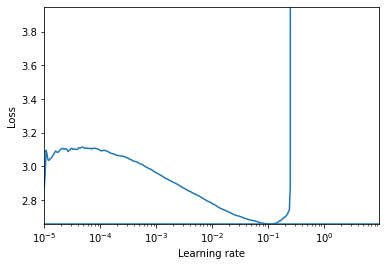

In [98]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs = 1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses))/1.4])

In [99]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [101]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='selu',kernel_initializer = 'lecun_normal'))
model.add(keras.layers.AlphaDropout(0.1))
model.add(keras.layers.Dense(10, activation = 'softmax'))

optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(optimizer = optimizer,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [102]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [103]:
n_epochs = 15
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled)/batch_size) * n_epochs, max_rate=0.05 )
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 16s 31ms/step - loss: 2.0439 - accuracy: 0.2918 - val_loss: 1.7744 - val_accuracy: 0.3786
Epoch 2/15
352/352 [==============================] - 10s 28ms/step - loss: 1.7483 - accuracy: 0.3791 - val_loss: 1.6994 - val_accuracy: 0.4004
Epoch 3/15
352/352 [==============================] - 10s 28ms/step - loss: 1.6185 - accuracy: 0.4260 - val_loss: 1.6647 - val_accuracy: 0.4112
Epoch 4/15
352/352 [==============================] - 10s 27ms/step - loss: 1.5492 - accuracy: 0.4490 - val_loss: 1.7295 - val_accuracy: 0.4124
Epoch 5/15
352/352 [==============================] - 10s 28ms/step - loss: 1.5000 - accuracy: 0.4678 - val_loss: 1.6196 - val_accuracy: 0.4308
Epoch 6/15
352/352 [==============================] - 10s 27ms/step - loss: 1.4581 - accuracy: 0.4829 - val_loss: 1.6732 - val_accuracy: 0.4446
Epoch 7/15
352/352 [==============================] - 10s 27ms/step - loss: 1.4211 - accuracy: 0.4955 - val_loss: 1.6135 - val_accuracy: